In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
qtde_nulas = df.isna().sum()
qtde_nulas

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
qtde_duplicados = df.duplicated().sum()
qtde_duplicados

0

In [ ]:
colunas = df.columns
print(f"Colunas do DataFrame: {colunas.tolist()}")

Colunas do DataFrame: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

| Variável             | Descrição                                                                                             | Valores possíveis                                     |
|---------------------|-------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| Gender              | Gênero do cliente                                                                                      | Male, Female                                         |
| Senior Citizen      | Indica se o cliente tem 65 anos ou mais                                                              | Yes, No                                              |
| Partner             | Indica se o cliente possui parceiro                                                                  | Yes, No                                              |
| Dependents          | Indica se o cliente possui dependentes (filhos, pais, avós, etc.)                                    | Yes, No                                              |
| Tenure Months       | Total de meses que o cliente está com a empresa                                                      | Número inteiro                                       |
| Phone Service       | Indica se o cliente possui serviço de telefone residencial                                          | Yes, No                                              |
| Multiple Lines      | Indica se o cliente possui múltiplas linhas telefônicas                                              | Yes, No                                              |
| Internet Service    | Tipo de serviço de internet contratado pelo cliente                                                  | No, DSL, Fiber Optic, Cable                          |
| Online Security     | Indica se o cliente possui serviço adicional de segurança online                                     | Yes, No                                              |
| Online Backup       | Indica se o cliente possui serviço adicional de backup online                                        | Yes, No                                              |
| Device Protection   | Indica se o cliente possui plano adicional de proteção de dispositivos                               | Yes, No                                              |
| Tech Support        | Indica se o cliente possui plano adicional de suporte técnico                                        | Yes, No                                              |
| Streaming TV        | Indica se o cliente utiliza serviço de streaming de TV                                               | Yes, No                                              |
| Streaming Movies    | Indica se o cliente utiliza serviço de streaming de filmes                                          | Yes, No                                              |
| Contract            | Tipo de contrato atual do cliente                                                                    | Month-to-Month, One Year, Two Year                  |
| Paperless Billing   | Indica se o cliente optou por fatura eletrônica                                                      | Yes, No                                              |
| Payment Method      | Forma de pagamento da fatura do cliente                                                             | Bank Withdrawal, Credit Card, Mailed Check          |
| Monthly Charge      | Valor total mensal atual cobrado do cliente por todos os serviços                                    | Número decimal                                       |
| Total Charge        | Valor total cobrado do cliente por todos os serviços                                    | Número decimal                                       |


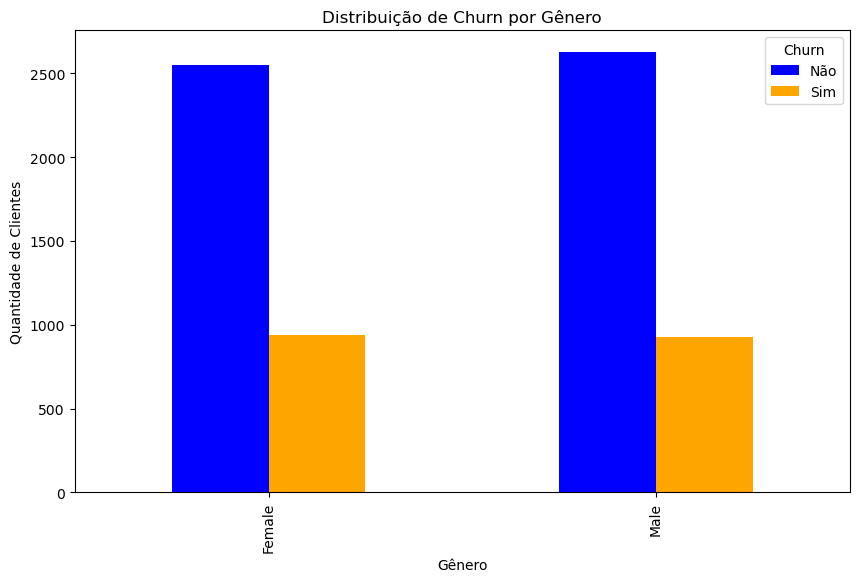

In [20]:
# Contar churn por gênero
churn_gender = df.groupby('gender')['Churn'].value_counts().unstack()

# Plotar gráfico de barras
churn_gender.plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])

plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


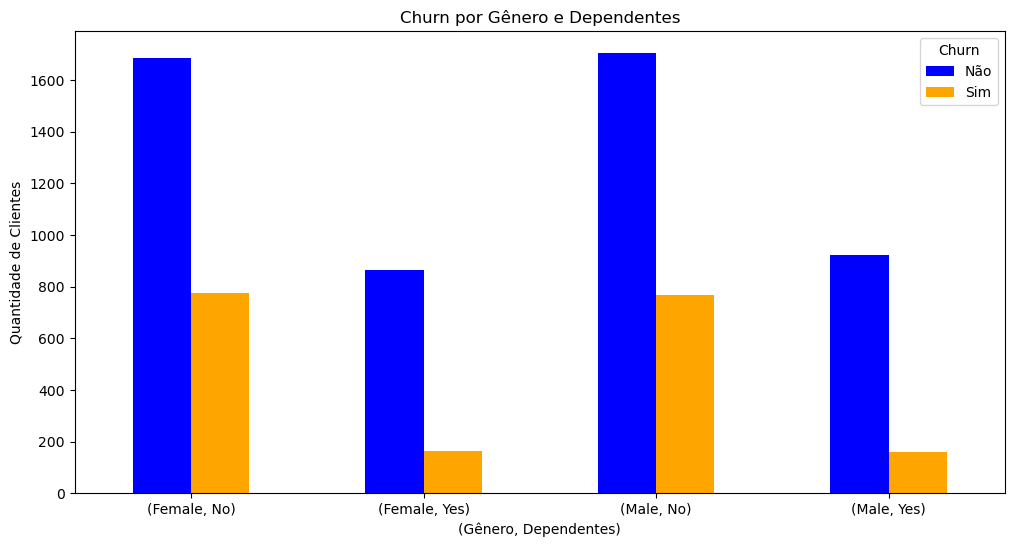

In [25]:
crosstab = pd.crosstab(
    [df['gender'], df['Dependents']],  # linhas: gênero + dependentes
    df['Churn']                        # colunas: churn
)

# Plotar gráfico de barras lado a lado
crosstab.plot(kind='bar', figsize=(12,6), color=['blue', 'orange'])

plt.title('Churn por Gênero e Dependentes')
plt.xlabel('(Gênero, Dependentes)')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.xticks(rotation=0)
plt.show()

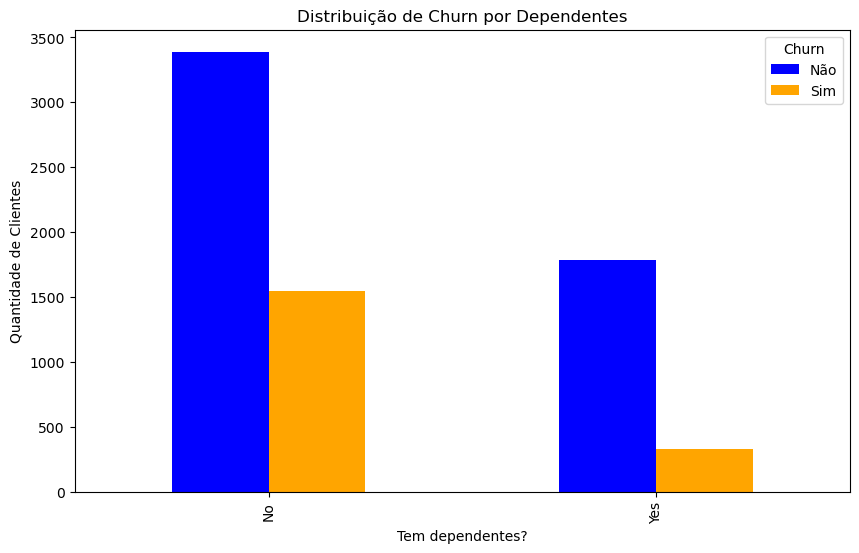

In [19]:
# Contar churn por dependentes
churn_dependents = df.groupby('Dependents')['Churn'].value_counts().unstack()

# Plotar gráfico de barras
churn_dependents.plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])

plt.title('Distribuição de Churn por Dependentes')
plt.xlabel('Tem dependentes?')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

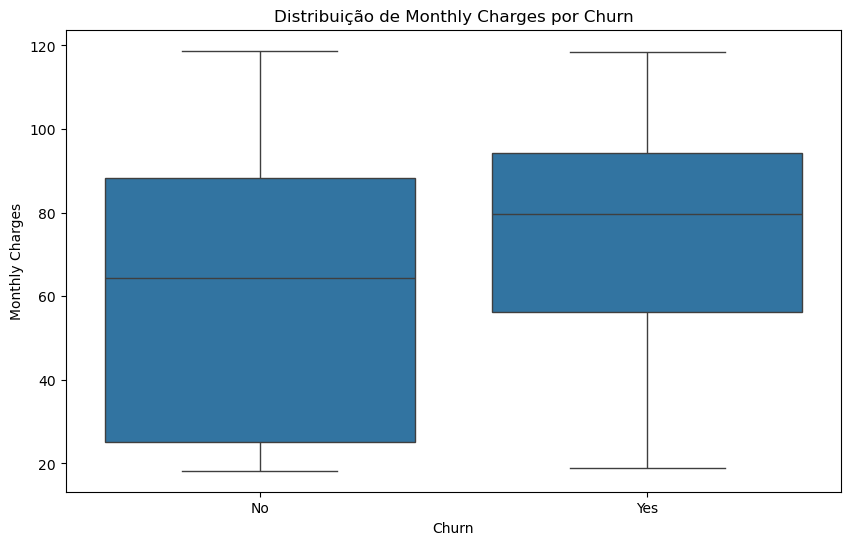

In [21]:
# Boxplot de MonthlyCharges por Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribuição de Monthly Charges por Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

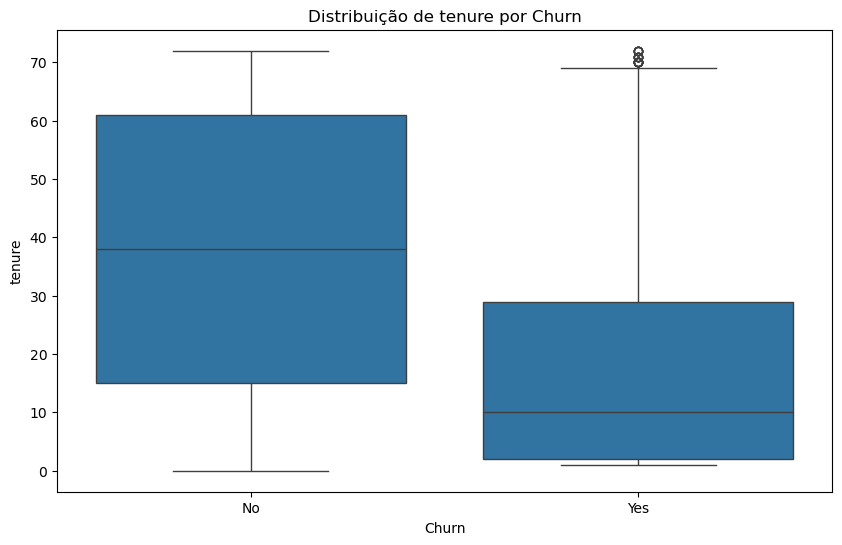

In [22]:
# Boxplot de TenureMonths por Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição de tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.show()

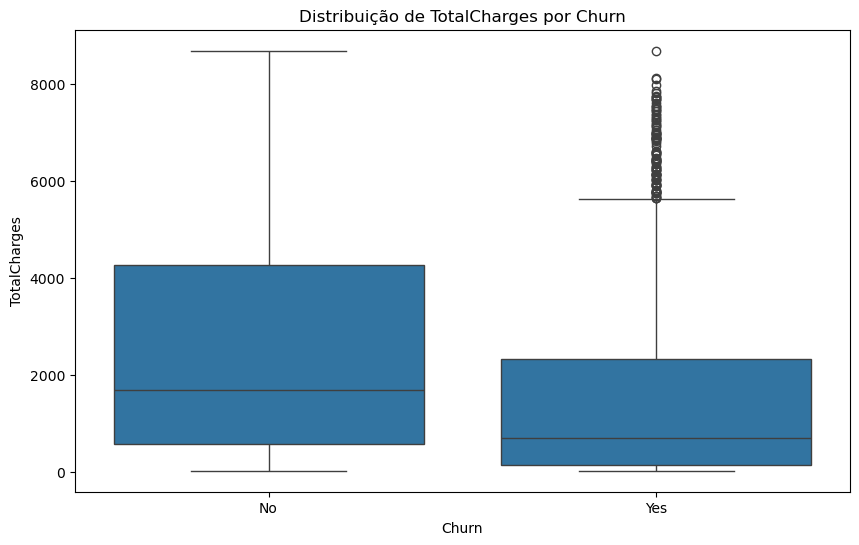

In [33]:
# Boxplot de Totalcharges por Churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Distribuição de TotalCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

In [ ]:
bool_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
cat_features = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


Boolean Features: []
Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
# tratamento de colunas booleanas
